In [1]:
import pandas as pd
A=pd.read_csv('C:/Users/acer/Desktop/python/Mall_Customers.csv')

In [2]:
A.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# looking for missing values

In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
A.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
A=A.drop(labels='CustomerID',axis=1)

In [9]:
A.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


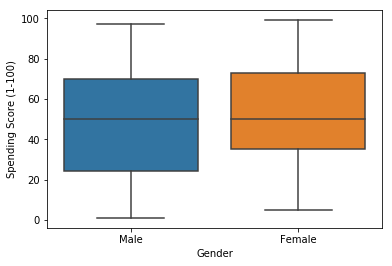

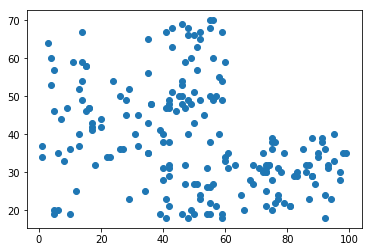

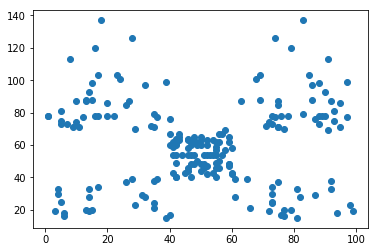

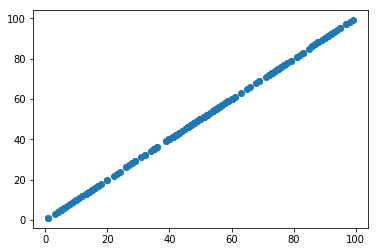

In [12]:
for i in A.columns:
    if (A[i].dtypes=='object'):
        sb.boxplot(A[i],A['Spending Score (1-100)'])
        plt.show()
    else:
        plt.scatter(A['Spending Score (1-100)'],A[i])
        plt.show()

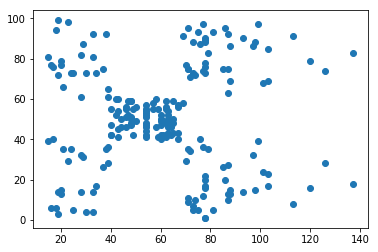

In [11]:
plt.scatter(A['Annual Income (k$)'],A['Spending Score (1-100)'])

# creating a model

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A=A.apply(le.fit_transform)

In [19]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(A[['Annual Income (k$)','Spending Score (1-100)']])

In [20]:
model.cluster_centers_

array([[23.64      , 35.32      ],
       [49.84210526, 15.15789474],
       [49.53846154, 68.20512821],
       [ 8.7826087 , 65.34782609]])

In [22]:
model.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [23]:
A['CV'] = model.labels_

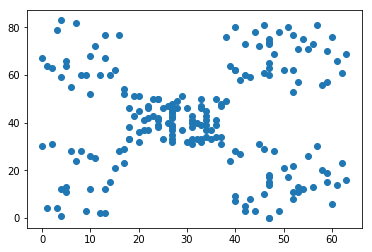

In [25]:
import matplotlib.pyplot as plt

plt.scatter(A['Annual Income (k$)'],A['Spending Score (1-100)'])


# finding best value of clusters

In [26]:
K = [1,2,3,4,5,6,7,8,9,10,11,12]
WCSS = []
for i in K:
   km = KMeans(n_clusters=i)
   model = km.fit(A[["Annual Income (k$)","Spending Score (1-100)"]])
   WCSS.append(model.inertia_)

Text(0.5,1,'Elbow curve')

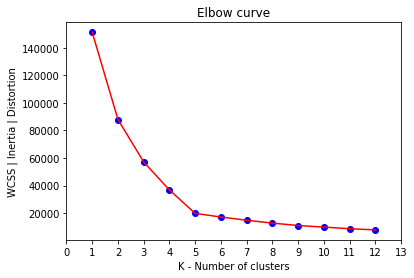

In [27]:
plt.scatter(K,WCSS,c="blue")
plt.plot(K,WCSS,c="red")
plt.xlabel("K - Number of clusters")
plt.xticks(range(0,14,1))
plt.ylabel("WCSS | Inertia | Distortion")
plt.title("Elbow curve")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


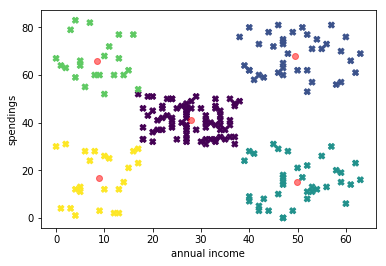

In [29]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
model=km.fit(A[['Annual Income (k$)','Spending Score (1-100)']])
B = A[["Annual Income (k$)","Spending Score (1-100)"]]
B['cluster'] = model.labels_
D = pd.DataFrame(model.cluster_centers_,columns=["X","Y"])##finding centroids
plt.scatter(B['Annual Income (k$)'],B['Spending Score (1-100)'],c=B.cluster,marker="X")##chnaging color and marker
plt.xlabel("annual income")
plt.ylabel('spendings')
plt.scatter(D.X,D.Y,c="red",marker="o",alpha=0.5)